In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import geoplot
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.cpg
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.prj
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.shx
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.shp
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.qmd
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.dbf
/kaggle/input/turkey-geolocation/tur_polbnda_adm1.prj
/kaggle/input/turkey-geolocation/tur_polbna_adm2.shp.xml
/kaggle/input/turkey-geolocation/tur_polbna_adm2.dbf
/kaggle/input/turkey-geolocation/tur_polbna_adm2.sbx
/kaggle/input/turkey-geolocation/tur_polbna_adm2.prj
/kaggle/input/turkey-geolocation/tur_polbnda_adm1.qpj
/kaggle/input/turkey-geolocation/tur_polbnda_adm0.prj
/kaggle/input/turkey-geolocation/tur_polbna_adm2.shp
/kaggle/input/turkey-geolocation/tur_polbnda_adm0.shp
/kaggle/input/turkey-geolocation/tur_polbnda_adm0.shp.xml
/kaggle/input/turkey-geolocation/tur_linebnda_adm0.shp.xml
/kaggle/input/turkey-geolo

In [2]:
ilceler=gpd.read_file('/kaggle/input/turkey-geolocation/tur_polbna_adm2.shp')
iller=gpd.read_file('/kaggle/input/turkey-geolocation/tur_polbnda_adm1.shp')
turkiye=gpd.read_file('/kaggle/input/turkey-geolocation/tur_polbnda_adm0.shp')
turkiye_line=gpd.read_file('/kaggle/input/turkey-geolocation/tur_linebnda_adm0.shp')

In [3]:
mahalleler = gpd.read_file('/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.shp')  

<Axes: >

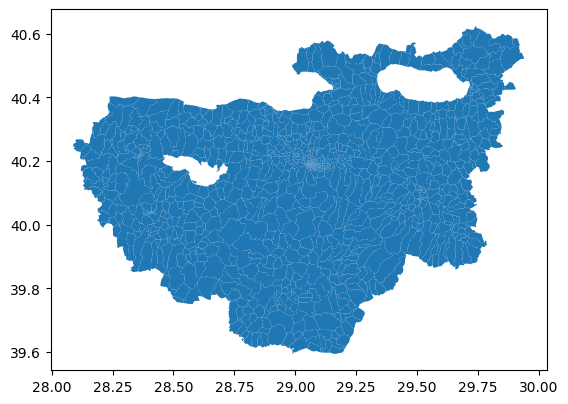

In [4]:
mahalleler.plot()

In [5]:
mahalleler.head()

FID                                  KIMLIK_NO  \
0  Mahalle_Sinirlari.1                                     10-670   
1  Mahalle_Sinirlari.2                                      05-40   
2  Mahalle_Sinirlari.3  01-{89A71CA2-4906-470D-9FB6-CDA01989D9F2}   
3  Mahalle_Sinirlari.4  01-{B79F10FF-79BD-41B8-BF73-39D3916C8DD6}   
4  Mahalle_Sinirlari.5                                     16-003   

              AD    ILCE_ADI  UAVT_KODU  \
0       ORHANİYE   KARACABEY     184059   
1        TİRİLYE     MUDANYA     184223   
2      GÖKÇEÖREN   OSMANGAZİ     183487   
3  GÜNEYBUDAKLAR   OSMANGAZİ     183519   
4        BALABAN  BÜYÜKORHAN     183541   

                                            geometry  
0  POLYGON ((28.65172 40.22363, 28.65184 40.22239...  
1  POLYGON ((28.79313 40.39472, 28.79402 40.39450...  
2  POLYGON ((28.98951 40.18004, 28.99033 40.17736...  
3  POLYGON ((29.18554 40.05728, 29.18533 40.05689...  
4  POLYGON ((28.93700 39.77130, 28.93962 39.76997...

In [6]:
nufus = pd.read_csv("/kaggle/input/dataset-bursa-mahalle/mahalle_nufus.csv")

In [7]:
nufus.tail()

ID MAHALLE_KIMLIK_NO  NUFUS CINSIYET      TARIH
6289  2994            17-028   59.0    KADIN  1/01/2018
6290  1945            17-028   58.0    KADIN  1/01/2017
6291  5092            17-028   47.0    ERKEK  1/01/2019
6292   896            17-028   51.0    ERKEK  1/01/2017
6293  6141            17-028   57.0    KADIN  1/01/2019

In [8]:
mahalleler.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   FID        1049 non-null   object  
 1   KIMLIK_NO  1049 non-null   object  
 2   AD         1046 non-null   object  
 3   ILCE_ADI   1049 non-null   object  
 4   UAVT_KODU  1049 non-null   int64   
 5   geometry   1049 non-null   geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 49.3+ KB


In [9]:
nufus.sort_values(by="MAHALLE_KIMLIK_NO")

ID                          MAHALLE_KIMLIK_NO    NUFUS CINSIYET  \
0      360  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  14905.0    ERKEK   
1     5605  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  15877.0    KADIN   
2     4556  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  16514.0    ERKEK   
3     3507  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  16002.0    ERKEK   
4     1409  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  14111.0    KADIN   
...    ...                                        ...      ...      ...   
6288  4043                                     17-028     47.0    ERKEK   
6289  2994                                     17-028     59.0    KADIN   
6290  1945                                     17-028     58.0    KADIN   
6291  5092                                     17-028     47.0    ERKEK   
6293  6141                                     17-028     57.0    KADIN   

          TARIH  
0     1/01/2017  
1     1/01/2019  
2     1/01/2019  
3     1/01/2018  
4     1/01/2017  
...         ...  
6288  1/01/2018  
6289  1/01/2018  
6290  1/01/2017  
6291  1/01/2019  
6293  1/01/2019  

[6294 rows x 5 columns]

In [10]:
nufus_unisex = nufus.drop(columns=['CINSIYET', 'ID'])

In [11]:
nufus_unisex.head()

MAHALLE_KIMLIK_NO    NUFUS      TARIH
0  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  14905.0  1/01/2017
1  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  15877.0  1/01/2019
2  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  16514.0  1/01/2019
3  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  16002.0  1/01/2018
4  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  14111.0  1/01/2017

In [12]:
nufus_unisex = nufus_unisex.groupby(['MAHALLE_KIMLIK_NO','TARIH']).sum().reset_index()

In [13]:
nufus_son = nufus_unisex.sort_values('TARIH').drop_duplicates('MAHALLE_KIMLIK_NO',keep='last').drop(columns=['TARIH'])

In [14]:
nufus_son.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 2684 to 3146
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MAHALLE_KIMLIK_NO  1049 non-null   object 
 1   NUFUS              1049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.6+ KB


In [15]:
mahalleler = mahalleler.merge(nufus_son, left_on='KIMLIK_NO', right_on='MAHALLE_KIMLIK_NO')
mahalleler = mahalleler.drop("MAHALLE_KIMLIK_NO", axis=1)

In [16]:
# GeoPandas.area, Öklid Geometrisi kullanıyor. Kesin sonuçları çıkaramadığı için uyarı veriyor.
mahalleler["yuzolcum"] = mahalleler.area

/tmp/ipykernel_18/826741171.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mahalleler["yuzolcum"] = mahalleler.area


In [17]:
mahalleler["yogunluk"] = mahalleler["NUFUS"] /  (mahalleler["yuzolcum"] * 10**6)

In [18]:
mahalleler.head()

FID                                  KIMLIK_NO  \
0  Mahalle_Sinirlari.1                                     10-670   
1  Mahalle_Sinirlari.2                                      05-40   
2  Mahalle_Sinirlari.3  01-{89A71CA2-4906-470D-9FB6-CDA01989D9F2}   
3  Mahalle_Sinirlari.4  01-{B79F10FF-79BD-41B8-BF73-39D3916C8DD6}   
4  Mahalle_Sinirlari.5                                     16-003   

              AD    ILCE_ADI  UAVT_KODU  \
0       ORHANİYE   KARACABEY     184059   
1        TİRİLYE     MUDANYA     184223   
2      GÖKÇEÖREN   OSMANGAZİ     183487   
3  GÜNEYBUDAKLAR   OSMANGAZİ     183519   
4        BALABAN  BÜYÜKORHAN     183541   

                                            geometry   NUFUS  yuzolcum  \
0  POLYGON ((28.65172 40.22363, 28.65184 40.22239...   123.0  0.000761   
1  POLYGON ((28.79313 40.39472, 28.79402 40.39450...  1478.0  0.002752   
2  POLYGON ((28.98951 40.18004, 28.99033 40.17736...   207.0  0.001496   
3  POLYGON ((29.18554 40.05728, 29.18533 40.05689...   387.0  0.002296   
4  POLYGON ((28.93700 39.77130, 28.93962 39.76997...   234.0  0.000411   

   yogunluk  
0  0.161719  
1  0.537092  
2  0.138396  
3  0.168558  
4  0.569811

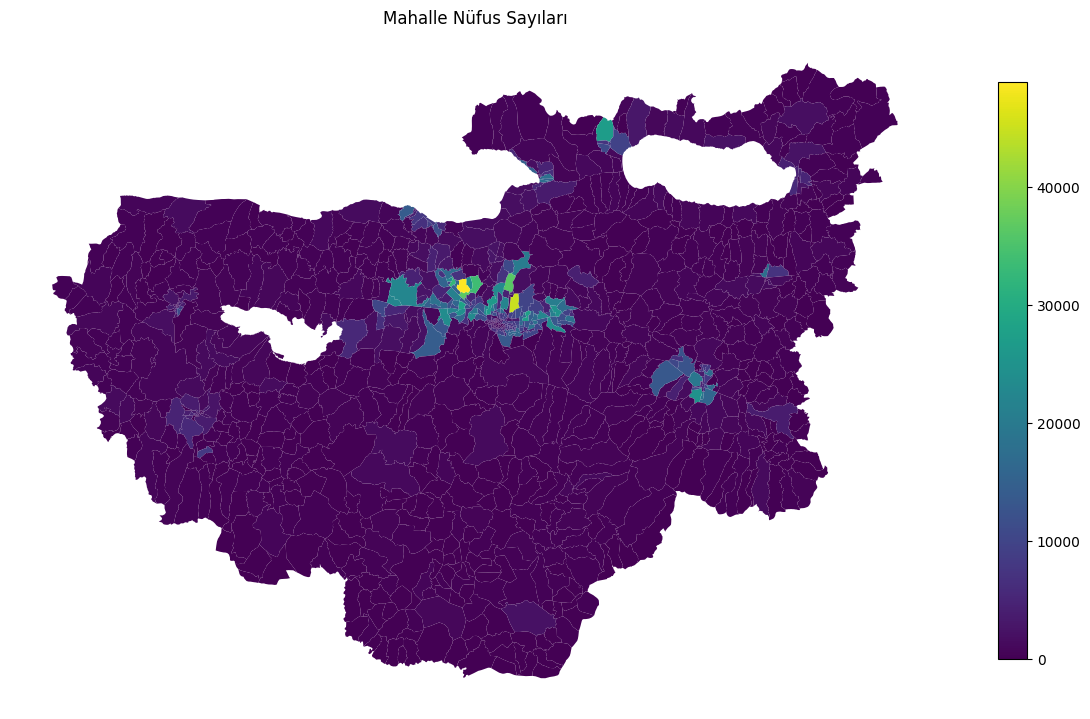

In [19]:
ax1 = mahalleler.plot(figsize=(15, 15), column='NUFUS', legend=True, legend_kwds={'shrink': 0.5})
ax1.set_title("Mahalle Nüfus Sayıları")
ax1.set_axis_off()

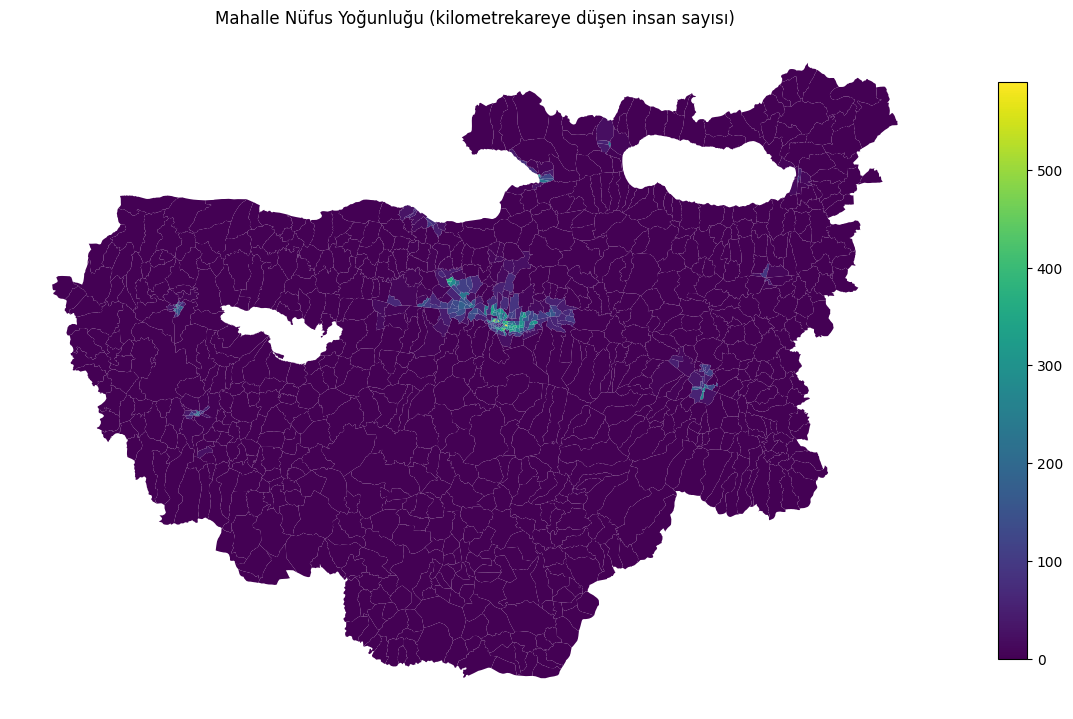

In [20]:
ax2 = mahalleler.plot(figsize=(15, 15), column='yogunluk', legend=True, legend_kwds={'shrink': 0.5})
ax2.set_title("Mahalle Nüfus Yoğunluğu (kilometrekareye düşen insan sayısı)")
ax2.set_axis_off()

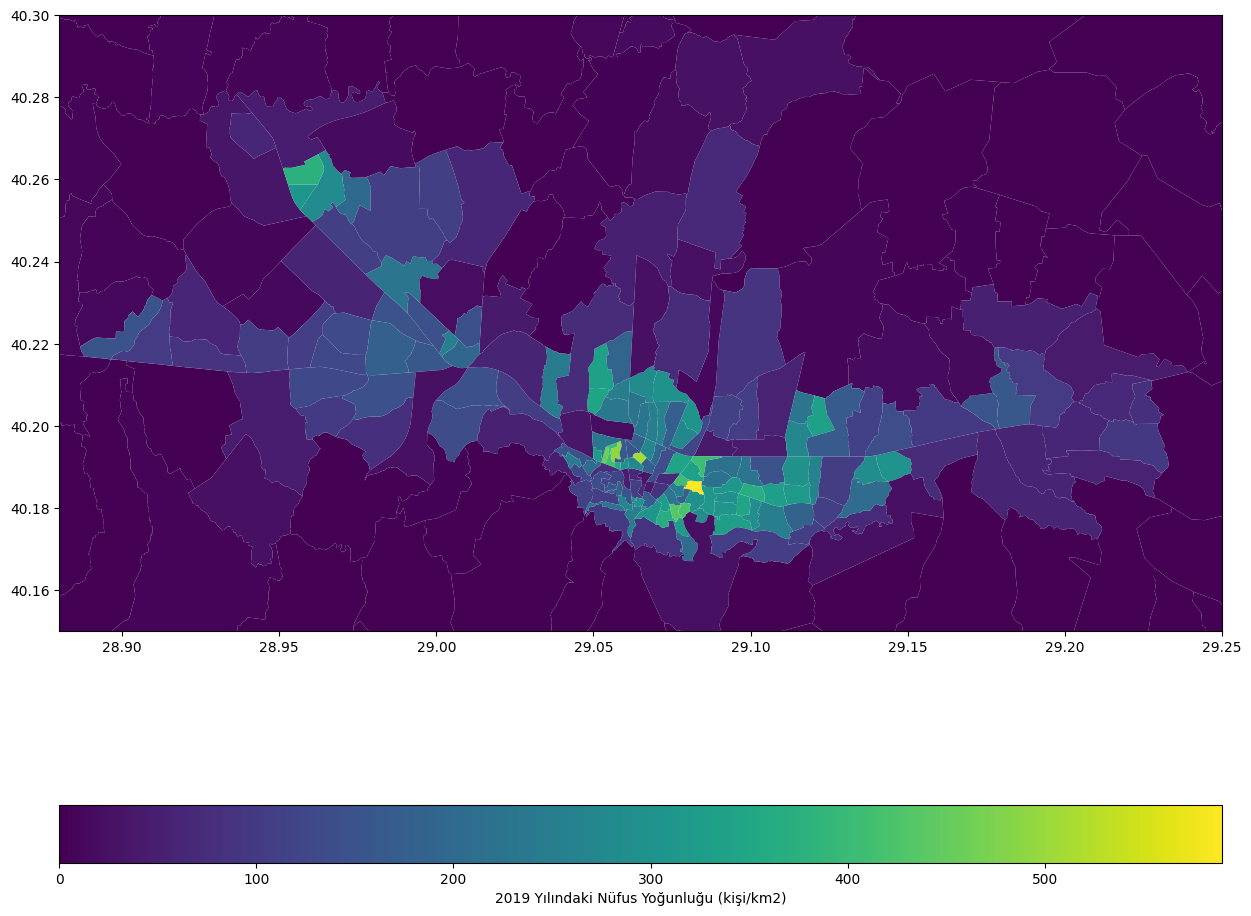

In [21]:
# nufüs yoğunluğunun fazla olduğu mahallelere yakınlaşmış bir bakış
fig, ax4 = plt.subplots(figsize=(15, 15))
mahalleler.plot(column='yogunluk',
                ax=ax4,
                legend=True,
               legend_kwds={"label": "2019 Yılındaki Nüfus Yoğunluğu (kişi/km2)", 
                            "orientation": "horizontal",})
ax4.set_xlim(28.88, 29.25)
ax4.set_ylim(40.15, 40.3)
plt.show()

In [22]:
# interaktif harita, diğer sütunları da gösterebilmek için kullanışlı bir araç
# github, JavaScript ayarları sebebiyle bu tip haritaların çıktılarını render etmiyor
# görüntüleyebilmek için; https://nbviewer.org/github/neysene/bursa/blob/master/mahalle.ipynb

mahalleler.explore("yogunluk")

In [23]:
park = gpd.read_file('/kaggle/input/dataset-bursa-mahalle/park.geojson')

<Axes: >

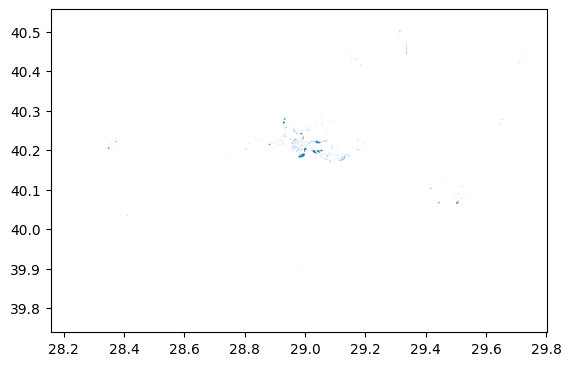

In [24]:
park.plot()

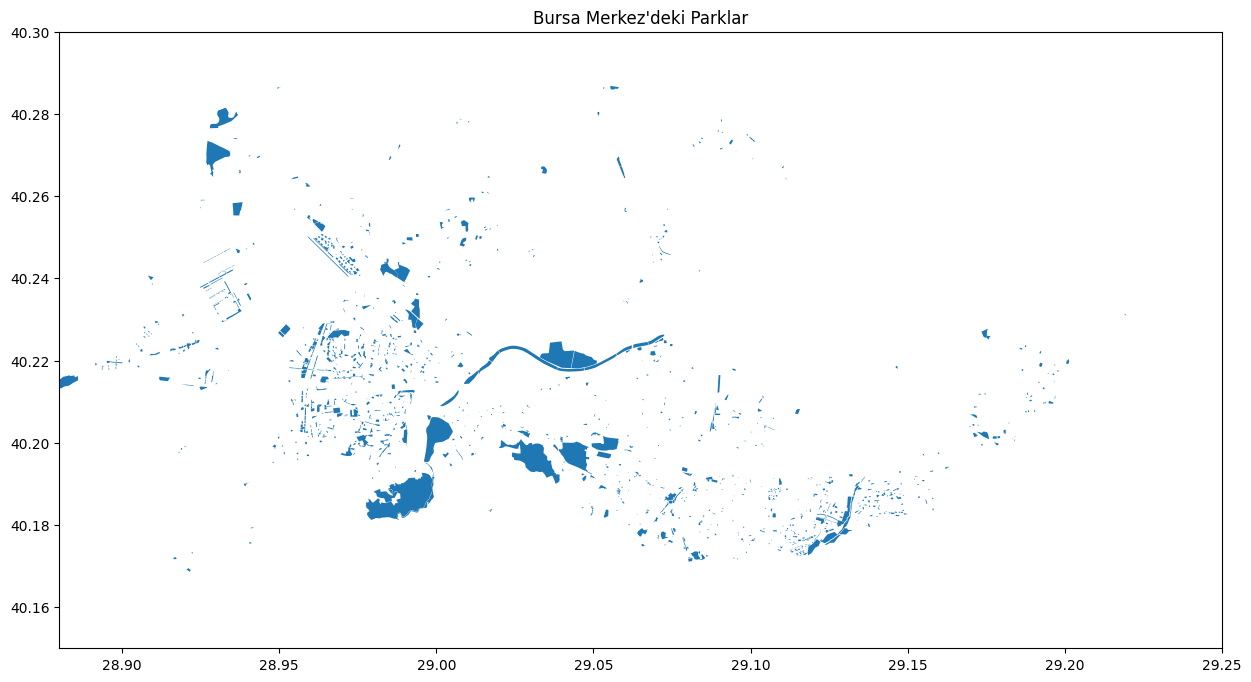

In [25]:
fig, ax5 = plt.subplots(figsize=(15, 15))
park.plot(ax=ax5)
ax5.set_xlim(28.88, 29.25)
ax5.set_ylim(40.15, 40.3)
ax5.set_title("Bursa Merkez'deki Parklar")
plt.show()

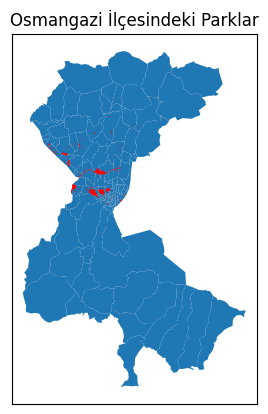

In [26]:
# osmangazi

df_osmangazi = mahalleler[mahalleler["ILCE_ADI"] == "OSMANGAZİ"]
f, ax = plt.subplots()
df_osmangazi.plot(ax=ax)
park_osmangazi = gpd.overlay(df_osmangazi, park, how='intersection')
park_osmangazi.plot(ax=ax, color="red")
ax.set_title("Osmangazi İlçesindeki Parklar")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

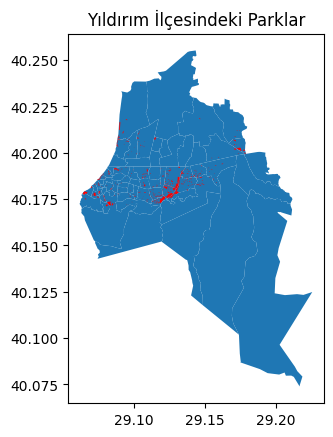

In [27]:
# yıldırım

df_yildirim = mahalleler[mahalleler["ILCE_ADI"] == "YILDIRIM"]
f, ax = plt.subplots()
df_yildirim.plot(ax=ax)
park_yildirim = gpd.overlay(df_yildirim, park, how='intersection')
park_yildirim.plot(ax=ax, color="red")
ax.set_title("Yıldırım İlçesindeki Parklar")
plt.show()

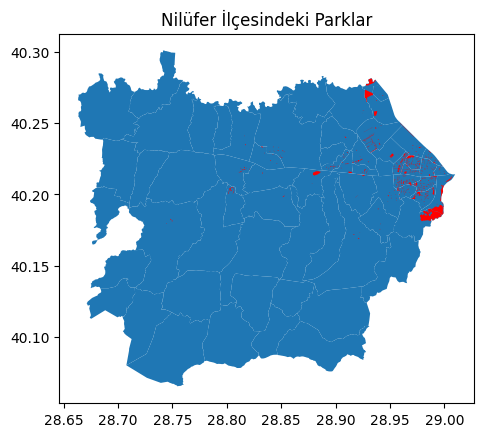

In [28]:
# nilüfer

df_nilufer = mahalleler[mahalleler["ILCE_ADI"] == "NİLÜFER"]
f, ax = plt.subplots()
df_nilufer.plot(ax=ax)
park_nilufer = gpd.overlay(df_nilufer, park, how='intersection')
park_nilufer.plot(ax=ax, color="red")
ax.set_title("Nilüfer İlçesindeki Parklar")
plt.show()